In [46]:
# Instalar pyspark
!pip install pyspark

### **CREAR SESION DE SPARK**

In [47]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

SpSession = SparkSession \
          .builder \
          .appName("Demo Spark") \
          .getOrCreate()

In [48]:
SpContext = SpSession.sparkContext
print(SpContext)

<SparkContext master=local[*] appName=Demo Spark>


### **CARGA DE DATOS**

In [49]:
data = SpSession.read.csv('cars.csv', header=True, sep=";")
data.show(10)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
|    Ford Galaxie 500|15.0|        8|       429.0|     198.0| 4341.|        10.0|   70|    US|
|    Chevrolet Impala|14.0|        8|       454.0|     220.0| 4354.|         9.0|   70|    US|
|   Plymouth Fury iii|14.0|        8|       440.0|

### **Conociendo la data**

In [50]:
data.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



In [51]:
data.columns

['Car',
 'MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model',
 'Origin']

In [52]:
data.describe().show()

+-------+--------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------+
|summary|                 Car|               MPG|        Cylinders|      Displacement|       Horsepower|            Weight|      Acceleration|             Model|Origin|
+-------+--------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------+
|  count|                 406|               406|              406|               406|              406|               406|               406|               406|   406|
|   mean|                NULL|23.051231527093602|5.475369458128079| 194.7795566502463|103.5295566502463|2979.4137931034484|15.519704433497521| 75.92118226600985|  NULL|
| stddev|                NULL|   8.4017773522706|1.712159631548529|104.92245837948867|40.52065912106347| 847.0043282393513|2.8033588163425462|3.74873734545

In [53]:
data.dtypes

[('Car', 'string'),
 ('MPG', 'string'),
 ('Cylinders', 'string'),
 ('Displacement', 'string'),
 ('Horsepower', 'string'),
 ('Weight', 'string'),
 ('Acceleration', 'string'),
 ('Model', 'string'),
 ('Origin', 'string')]

### **SELECCIÓN DE COLUMNAS**

In [54]:
from os import truncate
#MÉTODO 1 nos muestra los primeros 20
data.select(data.Car, data.Origin).show(truncate=False)

+--------------------------------+------+
|Car                             |Origin|
+--------------------------------+------+
|Chevrolet Chevelle Malibu       |US    |
|Buick Skylark 320               |US    |
|Plymouth Satellite              |US    |
|AMC Rebel SST                   |US    |
|Ford Torino                     |US    |
|Ford Galaxie 500                |US    |
|Chevrolet Impala                |US    |
|Plymouth Fury iii               |US    |
|Pontiac Catalina                |US    |
|AMC Ambassador DPL              |US    |
|Citroen DS-21 Pallas            |Europe|
|Chevrolet Chevelle Concours (sw)|US    |
|Ford Torino (sw)                |US    |
|Plymouth Satellite (sw)         |US    |
|AMC Rebel SST (sw)              |US    |
|Dodge Challenger SE             |US    |
|Plymouth 'Cuda 340              |US    |
|Ford Mustang Boss 302           |US    |
|Chevrolet Monte Carlo           |US    |
|Buick Estate Wagon (sw)         |US    |
+--------------------------------+

In [55]:
#MÉTODO 2
data.select(data['car']).show(truncate=False)

+--------------------------------+
|car                             |
+--------------------------------+
|Chevrolet Chevelle Malibu       |
|Buick Skylark 320               |
|Plymouth Satellite              |
|AMC Rebel SST                   |
|Ford Torino                     |
|Ford Galaxie 500                |
|Chevrolet Impala                |
|Plymouth Fury iii               |
|Pontiac Catalina                |
|AMC Ambassador DPL              |
|Citroen DS-21 Pallas            |
|Chevrolet Chevelle Concours (sw)|
|Ford Torino (sw)                |
|Plymouth Satellite (sw)         |
|AMC Rebel SST (sw)              |
|Dodge Challenger SE             |
|Plymouth 'Cuda 340              |
|Ford Mustang Boss 302           |
|Chevrolet Monte Carlo           |
|Buick Estate Wagon (sw)         |
+--------------------------------+
only showing top 20 rows



In [56]:
#MÉTODO 3
from pyspark.sql.functions import col
data.select(col('car'), col('Model')).show(truncate=False)

+--------------------------------+-----+
|car                             |Model|
+--------------------------------+-----+
|Chevrolet Chevelle Malibu       |70   |
|Buick Skylark 320               |70   |
|Plymouth Satellite              |70   |
|AMC Rebel SST                   |70   |
|Ford Torino                     |70   |
|Ford Galaxie 500                |70   |
|Chevrolet Impala                |70   |
|Plymouth Fury iii               |70   |
|Pontiac Catalina                |70   |
|AMC Ambassador DPL              |70   |
|Citroen DS-21 Pallas            |70   |
|Chevrolet Chevelle Concours (sw)|70   |
|Ford Torino (sw)                |70   |
|Plymouth Satellite (sw)         |70   |
|AMC Rebel SST (sw)              |70   |
|Dodge Challenger SE             |70   |
|Plymouth 'Cuda 340              |70   |
|Ford Mustang Boss 302           |70   |
|Chevrolet Monte Carlo           |70   |
|Buick Estate Wagon (sw)         |70   |
+--------------------------------+-----+
only showing top

In [57]:
#Método 1 de la selección multiple de columnas
data.select(data.Car, data.Cylinders).show(truncate=False)

+--------------------------------+---------+
|Car                             |Cylinders|
+--------------------------------+---------+
|Chevrolet Chevelle Malibu       |8        |
|Buick Skylark 320               |8        |
|Plymouth Satellite              |8        |
|AMC Rebel SST                   |8        |
|Ford Torino                     |8        |
|Ford Galaxie 500                |8        |
|Chevrolet Impala                |8        |
|Plymouth Fury iii               |8        |
|Pontiac Catalina                |8        |
|AMC Ambassador DPL              |8        |
|Citroen DS-21 Pallas            |4        |
|Chevrolet Chevelle Concours (sw)|8        |
|Ford Torino (sw)                |8        |
|Plymouth Satellite (sw)         |8        |
|AMC Rebel SST (sw)              |8        |
|Dodge Challenger SE             |8        |
|Plymouth 'Cuda 340              |8        |
|Ford Mustang Boss 302           |8        |
|Chevrolet Monte Carlo           |8        |
|Buick Est

In [58]:
#Método 2 de la selección multiple de columnas
data.select(data['car'], data['Horsepower']).show(truncate=False)

+--------------------------------+----------+
|car                             |Horsepower|
+--------------------------------+----------+
|Chevrolet Chevelle Malibu       |130.0     |
|Buick Skylark 320               |165.0     |
|Plymouth Satellite              |150.0     |
|AMC Rebel SST                   |150.0     |
|Ford Torino                     |140.0     |
|Ford Galaxie 500                |198.0     |
|Chevrolet Impala                |220.0     |
|Plymouth Fury iii               |215.0     |
|Pontiac Catalina                |225.0     |
|AMC Ambassador DPL              |190.0     |
|Citroen DS-21 Pallas            |115.0     |
|Chevrolet Chevelle Concours (sw)|165.0     |
|Ford Torino (sw)                |153.0     |
|Plymouth Satellite (sw)         |175.0     |
|AMC Rebel SST (sw)              |175.0     |
|Dodge Challenger SE             |170.0     |
|Plymouth 'Cuda 340              |160.0     |
|Ford Mustang Boss 302           |140.0     |
|Chevrolet Monte Carlo           |

In [59]:
#Método 3 de la selección multiple de columnas
from pyspark.sql.functions import col
data.select(col('CAR'), col('Horsepower')).show(truncate=False)

+--------------------------------+----------+
|CAR                             |Horsepower|
+--------------------------------+----------+
|Chevrolet Chevelle Malibu       |130.0     |
|Buick Skylark 320               |165.0     |
|Plymouth Satellite              |150.0     |
|AMC Rebel SST                   |150.0     |
|Ford Torino                     |140.0     |
|Ford Galaxie 500                |198.0     |
|Chevrolet Impala                |220.0     |
|Plymouth Fury iii               |215.0     |
|Pontiac Catalina                |225.0     |
|AMC Ambassador DPL              |190.0     |
|Citroen DS-21 Pallas            |115.0     |
|Chevrolet Chevelle Concours (sw)|165.0     |
|Ford Torino (sw)                |153.0     |
|Plymouth Satellite (sw)         |175.0     |
|AMC Rebel SST (sw)              |175.0     |
|Dodge Challenger SE             |170.0     |
|Plymouth 'Cuda 340              |160.0     |
|Ford Mustang Boss 302           |140.0     |
|Chevrolet Monte Carlo           |

### **AGREGAR NUEVAS COLUMNAS**

In [60]:
#CASO 1

from pyspark.sql.functions import lit

df = data.withColumn('First_Column',lit(1))
df.show(5, truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|First_Column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |1           |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |1           |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |1           |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |1           |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |1           |
+-------------------------+----+---------+------------+----------+------+------------+-----+----

In [61]:
#CASO 2
from pyspark.sql.functions import lit

# multiplica Horsepower por Acceleration y agrega la nueva columna con la multiplicacion
df = data.withColumn('Second_Column',data.Horsepower * data.Acceleration)
df.show(5, truncate=False)

# df = data.withColumn('Second_Column',lit(2)) \
#           .withColumn('third_column',lit('Third Column'))
# df.show(5, truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|Second_Column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+-------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |1560.0       |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |1897.5       |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |1650.0       |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |1800.0       |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |1470.0       |
+-------------------------+----+---------+------------+----------+------+------------+--

### **AGRUPACIÓN**

In [62]:
df.groupBy('Horsepower').count().show(5)

+----------+-----+
|Horsepower|count|
+----------+-----+
|     102.0|    1|
|     68.00|    6|
|     116.0|    1|
|     145.0|    7|
|     90.00|   20|
+----------+-----+
only showing top 5 rows



In [63]:
df.groupBy('Origin','Model').count().show(20)

+------+-----+-----+
|Origin|Model|count|
+------+-----+-----+
| Japan|   76|    4|
|    US|   81|   13|
|    US|   80|    7|
|    US|   76|   22|
| Japan|   70|    2|
|    US|   78|   22|
|Europe|   76|    8|
|    US|   70|   27|
| Japan|   75|    4|
|Europe|   80|    9|
| Japan|   77|    6|
|Europe|   72|    5|
|    US|   75|   20|
|    US|   79|   23|
|    US|   82|   20|
|Europe|   75|    6|
| Japan|   78|    8|
|    US|   71|   20|
| Japan|   82|    9|
| Japan|   80|   13|
+------+-----+-----+
only showing top 20 rows



### **Eliminar Columnas**

In [64]:
df = df.drop('Second_Column','third_column')
df.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [65]:
df

DataFrame[Car: string, MPG: string, Cylinders: string, Displacement: string, Horsepower: string, Weight: string, Acceleration: string, Model: string, Origin: string]

### **Filtrar Datos**

In [66]:
total_count = df.count()
print("Total de registros:", total_count)

cars_usa = df.filter(col('Origin')=="US").count()
print("Total de registros en US:", cars_usa)

cars_europe = df.filter(col('Origin')=="Europe").count()
print("Total de registros en Europe:", cars_europe)

cars_japan = df.filter(col('Origin')=="Japan").count()
print("Total de registros en Japan:", cars_japan)

df.filter(col('Origin')=="US").show(5, truncate=False)
df.filter(col('Origin')=="Europe").show(5, truncate=False)
df.filter(col('Origin')=="Japan").show(5, truncate=False)

Total de registros: 406
Total de registros en US: 254
Total de registros en Europe: 73
Total de registros en Japan: 79
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+--------

In [67]:
total_count = df.count()
print("Total de registros:", total_count)
usa= df.filter((col('Origin')=="US") & (col('Horsepower')=="175.0")).count()
print("Total de registros:", usa)

df.filter((col('Origin')=="US") & (col('Horsepower')=="175.0")).show(truncate=False)

Total de registros: 406
Total de registros: 7
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Plymouth Satellite (sw)  |0   |8        |383.0       |175.0     |4166. |10.5        |70   |US    |
|AMC Rebel SST (sw)       |0   |8        |360.0       |175.0     |3850. |11.0        |70   |US    |
|Pontiac Catalina Brougham|14.0|8        |400.0       |175.0     |4464. |11.5        |71   |US    |
|Pontiac Safari (sw)      |13.0|8        |400.0       |175.0     |5140. |12.0        |71   |US    |
|Pontiac Catalina         |14.0|8        |400.0       |175.0     |4385. |12.0        |72   |US    |
|Buick Century 350        |13.0|8        |350.0       |175.0     |4100. |13.0        |73   |US    |
|AMC Ambassador Brougham  |13.0|8        |360.0       

### **ORDENAR FILAS**

In [68]:
df.orderBy('Cylinders').show(truncate=False)

+----------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+----------------------------+----+---------+------------+----------+------+------------+-----+------+
|Mazda RX2 Coupe             |19.0|3        |70.00       |97.00     |2330. |13.5        |72   |Japan |
|Mazda RX3                   |18.0|3        |70.00       |90.00     |2124. |13.5        |73   |Japan |
|Mazda RX-4                  |21.5|3        |80.00       |110.0     |2720. |13.5        |77   |Japan |
|Mazda RX-7 GS               |23.7|3        |70.00       |100.0     |2420. |12.5        |80   |Japan |
|Datsun 510 (sw)             |28.0|4        |97.00       |92.00     |2288. |17.0        |72   |Japan |
|Mercury Capri 2000          |23.0|4        |122.0       |86.00     |2220. |14.0        |71   |US    |
|Chevrolet Vega (sw)         |22.0|4        |140.0       |72.00     |2408

In [69]:
df.orderBy('Cylinders', ascending=False).show(truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Plymouth 'Cuda 340       |14.0|8        |340.0       |160.0     |3609. |8.0         |70   |US    |
|Pontiac Safari (sw)      |13.0|8        |400.0       |175.0     |5140. |12.0        |71   |US    |
|Ford Mustang Boss 302    |0   |8        |302.0       |140.0     |3353. |8.0         |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Chevrolet Monte Carlo    |15.0|8        |400.0       |150.0     |3761. |9.5         |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Buick Estate Wagon (sw)  |14.0|8        |455.0       |225.0     |3086. |10.0        |70   |US    |


In [71]:
df.groupBy('Origin').count().orderBy('count', ascending=False).show()

+------+-----+
|Origin|count|
+------+-----+
|    US|  254|
| Japan|   79|
|Europe|   73|
+------+-----+



### **Graficar Datos**

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

df_grouped = df.groupBy('Origin').count().orderBy('count', ascending=False)
df_grouped.show()

df_pandas = df_grouped.toPandas()

+------+-----+
|Origin|count|
+------+-----+
|    US|  254|
| Japan|   79|
|Europe|   73|
+------+-----+



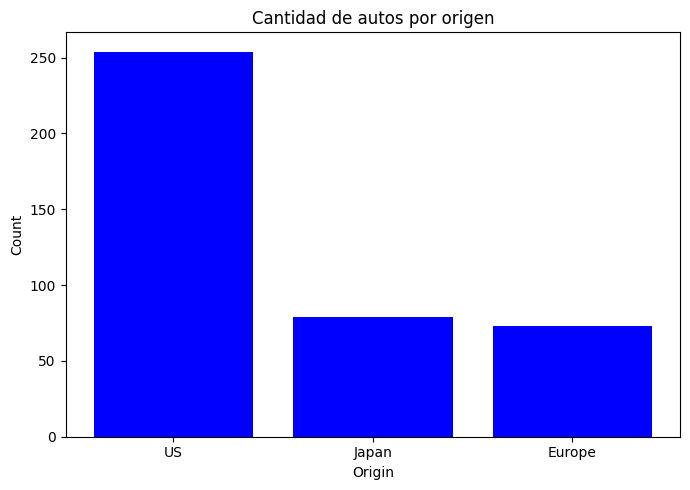

In [76]:
plt.figure(figsize=(7, 5))
plt.bar(df_pandas['Origin'], df_pandas['count'], color='blue')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Cantidad de autos por origen')
plt.tight_layout()
plt.show()

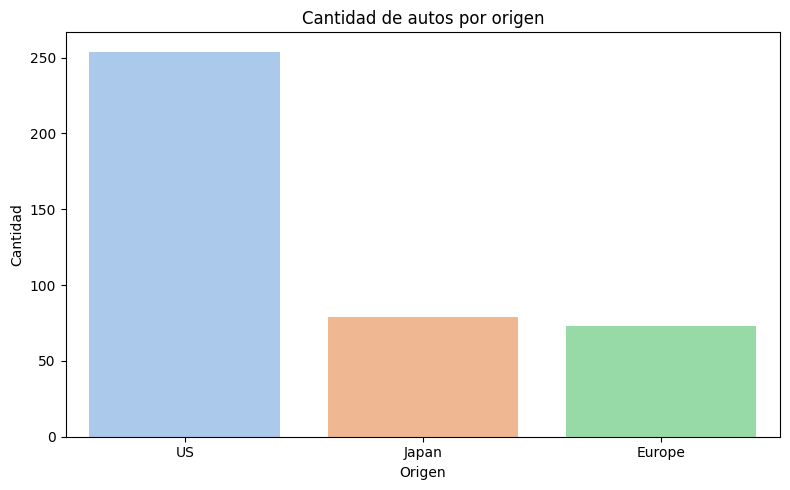

In [81]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Origin', y='count', data=df_pandas, hue='Origin', palette='pastel', dodge=False, legend=False)
plt.title('Cantidad de autos por origen')
plt.xlabel('Origen')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

### **Guardar Datos**

In [82]:
# Guardar datos
df_pandas.to_csv('df_pandas.csv', index=False)